In [1]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

2023-04-15 20:33:59.248225: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


2.9.1


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


2023-04-15 20:34:11.547200: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/maven/3.6.3/lib:/usr/local/cuda/latest/lib64/:/usr/local/cuda/latest/extras/CUPTI/lib64:/usr/lib:/usr/local/cuda/latest/:/usr/local/cuda/latest/lib64
2023-04-15 20:34:11.547214: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-15 20:34:11.547222: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dover): /proc/driver/nvidia/version does not exist


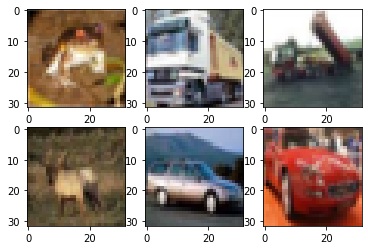

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [3]:
cifar= tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()


train_labels = train_labels.reshape(-1,)
train_images = train_images/255 

test_labels = test_labels.reshape(-1,)
test_images = test_images/255

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)



### Dense Neural Network which we used in MNIST 
#### same model gave accuracy for 97% on MNIST


In [14]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10))

# model.summary()

### CNN Model that we used for MNIST dataet
#### same model gave accuracy for 98% on MNIST


In [9]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(10))

# model.summary()


### Complile and Train the model

In [15]:
from keras import optimizers
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=100

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/10
500/500 [==============================] - 1s 806us/step - loss: 1.9225 - accuracy: 0.3167
Epoch 2/10
500/500 [==============================] - 0s 806us/step - loss: 1.7686 - accuracy: 0.3745
Epoch 3/10
500/500 [==============================] - 0s 829us/step - loss: 1.7054 - accuracy: 0.3933
Epoch 4/10
500/500 [==============================] - 0s 801us/step - loss: 1.6583 - accuracy: 0.4132
Epoch 5/10
500/500 [==============================] - 0s 808us/step - loss: 1.6272 - accuracy: 0.4256
Epoch 6/10
500/500 [==============================] - 0s 804us/step - loss: 1.6106 - accuracy: 0.4302
Epoch 7/10
500/500 [==============================] - 0s 808us/step - loss: 1.5889 - accuracy: 0.4358
Epoch 8/10
500/500 [==============================] - 0s 824us/step - loss: 1.5707 - accuracy: 0.4448
Epoch 9/10
500/500 [==============================] - 0s 816us/step - loss: 1.5575 - accuracy: 0.4476
Epoch 10/10
500/500 [==============================] - 0s 803us/step - loss: 1.540

In [16]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

100/100 [==============================] - 0s 475us/step - loss: 1.5611 - accuracy: 0.4460
Accuracy :  0.44600000977516174


#### Adding SoftMax Layer

Prediction :  ship


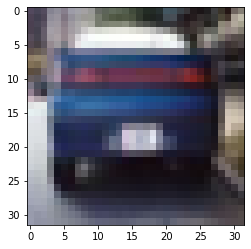

In [17]:

#prediction time
pred_model= tf.keras.models.Sequential();
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(1000)

predictions=pred_model(test_images)
pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",classes[test_labels[label0]])

313/313 [==============================] - 0s 331us/step


<AxesSubplot:>

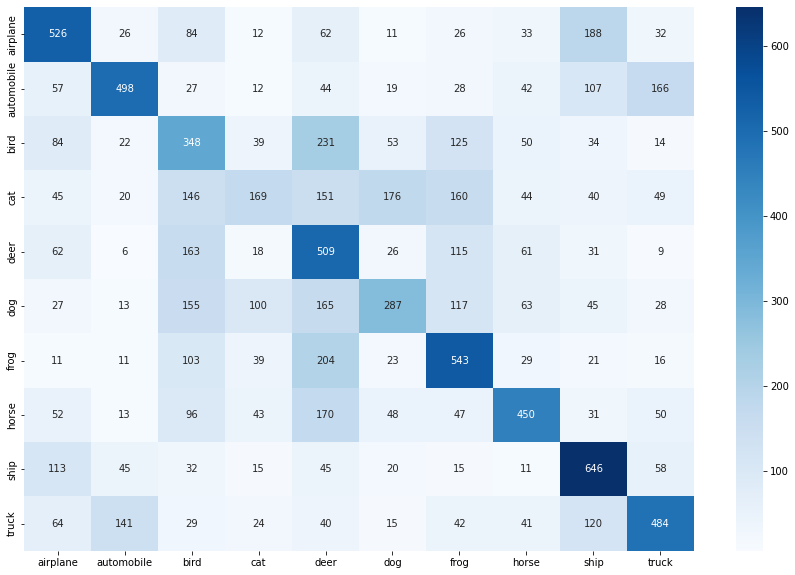

In [18]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")